# PROYECTO DE VISUALIZACION DE DATOS CON MATPLOTLIB Y SEABORN

- En este proyecto, visualizaremos los precios de las acciones usando Seaborn y Matplotlib. Se consideran 4 acciones, incluidas JP Morgan Chase (JP), Procter and Gamble (P&G) (PG), Apple (AAPL) y United Airlines (UAL).

In [1]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importamos los datos
stocks_df = pd.read_csv('stocks_daily_prices.csv')
stocks_df

,Date,AAPL,JPM,PG,UAL
0,1/2/2008,5.949703,29.448614,47.058838,29.915234
1,1/3/2008,5.952452,29.246094,47.058838,29.690800
2,1/4/2008,5.498071,28.582682,46.870098,31.000002
3,1/7/2008,5.424478,28.868999,47.175980,29.180000
4,1/8/2008,5.229351,27.723747,47.299629,24.389999
...,...,...,...,...,...
3637,6/13/2022,131.880005,115.989998,138.149994,37.020000
3638,6/14/2022,132.759995,114.059998,133.839996,36.990002
3639,6/15/2022,135.429993,115.410004,132.509995,37.889999
3640,6/16/2022,130.059998,113.430000,133.320007,34.779999


In [3]:
daily_returns_df = pd.read_csv('stocks_daily_returns.csv')
daily_returns_df

,Date,AAPL,JPM,PG,UAL
0,1/2/2008,0.000000,0.000000,0.000000,0.000000
1,1/3/2008,0.046203,-0.687708,0.000000,-0.750233
2,1/4/2008,-7.633517,-2.268378,-0.401072,4.409454
3,1/7/2008,-1.338518,1.001718,0.652615,-5.870973
4,1/8/2008,-3.597157,-3.967066,0.262103,-16.415356
...,...,...,...,...,...
3637,6/13/2022,-3.828484,-2.977838,-2.677001,-10.058308
3638,6/14/2022,0.667265,-1.663937,-3.119796,-0.081034
3639,6/15/2022,2.011147,1.183593,-0.993725,2.433084
3640,6/16/2022,-3.965145,-1.715625,0.611284,-8.207972


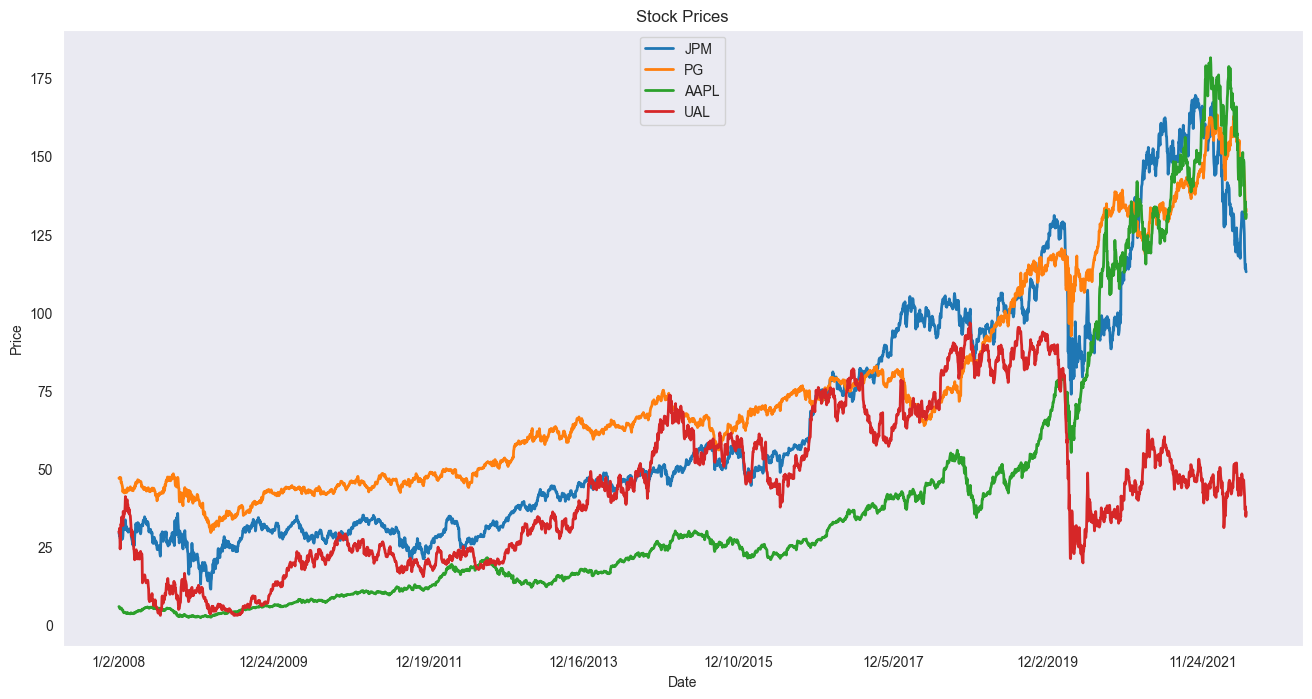

In [5]:
# Graficamos los precios de las acciones con un diagrama de lineas
stocks_df.plot(x='Date', y=['JPM', 'PG', 'AAPL', 'UAL'], linewidth = 2, figsize=(16, 8))
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend(loc='upper center')
plt.grid()

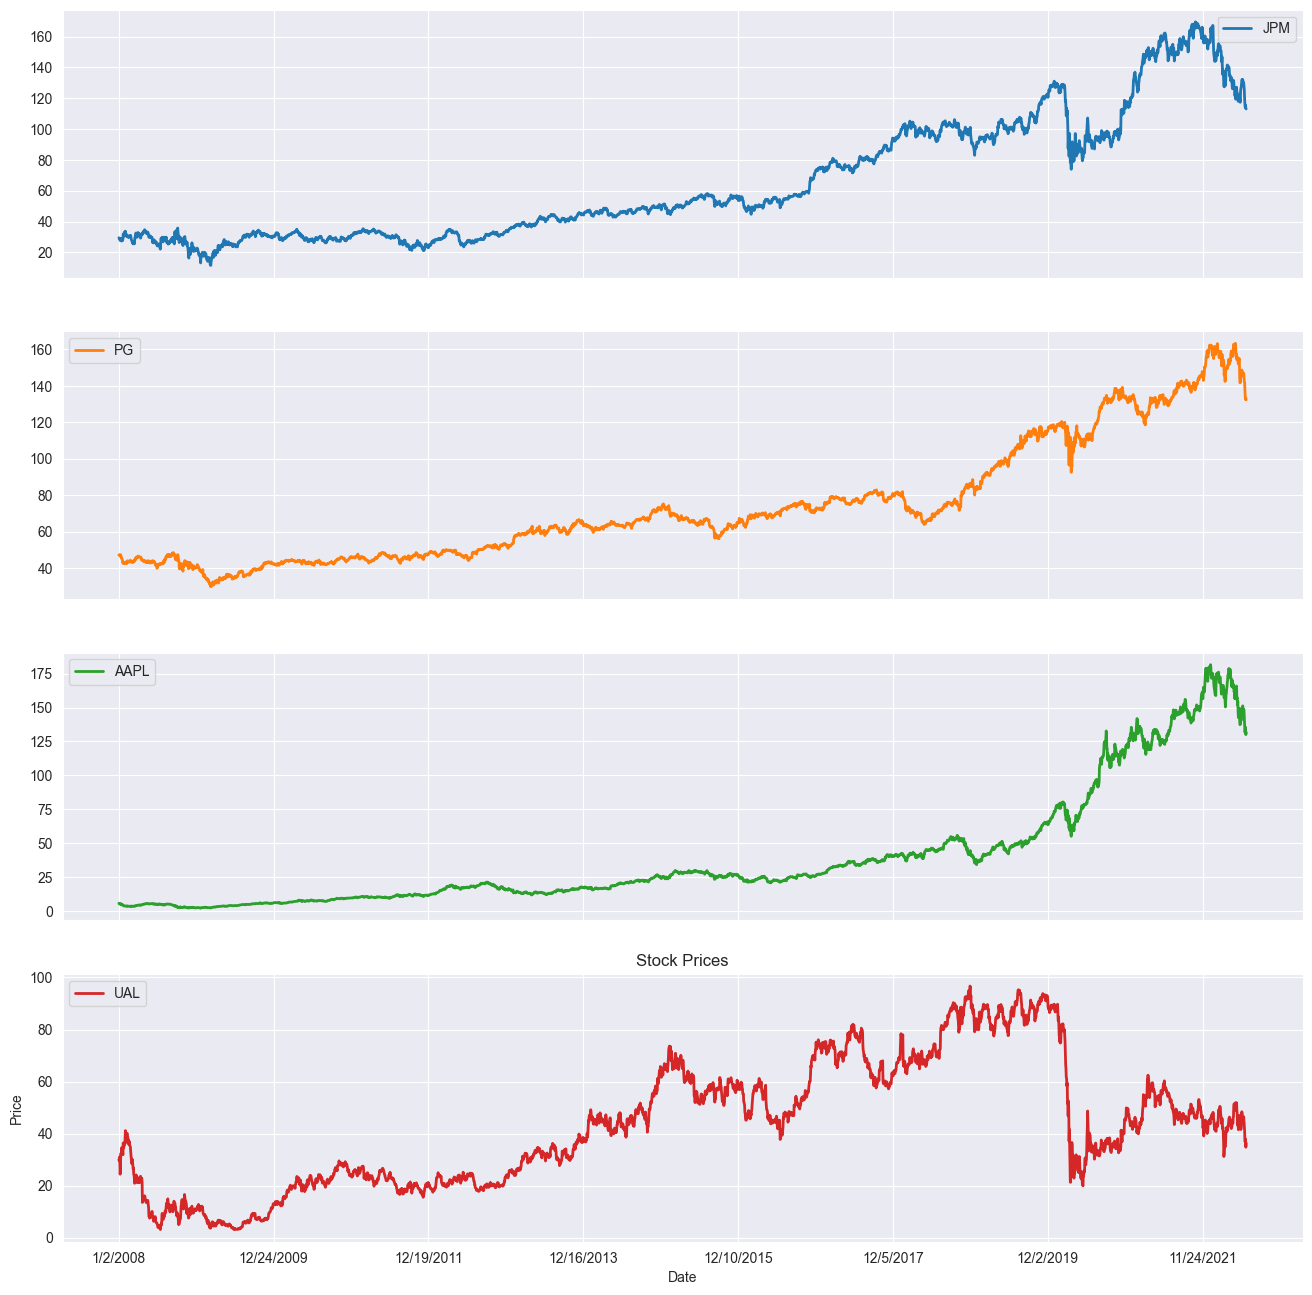

In [7]:
# Graficamos los precios de las acciones con subplots
stocks_df.plot(x='Date', y=['JPM', 'PG', 'AAPL', 'UAL'], linewidth = 2, figsize=(16, 16), subplots = True, grid = True)
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend(loc = 'upper left')

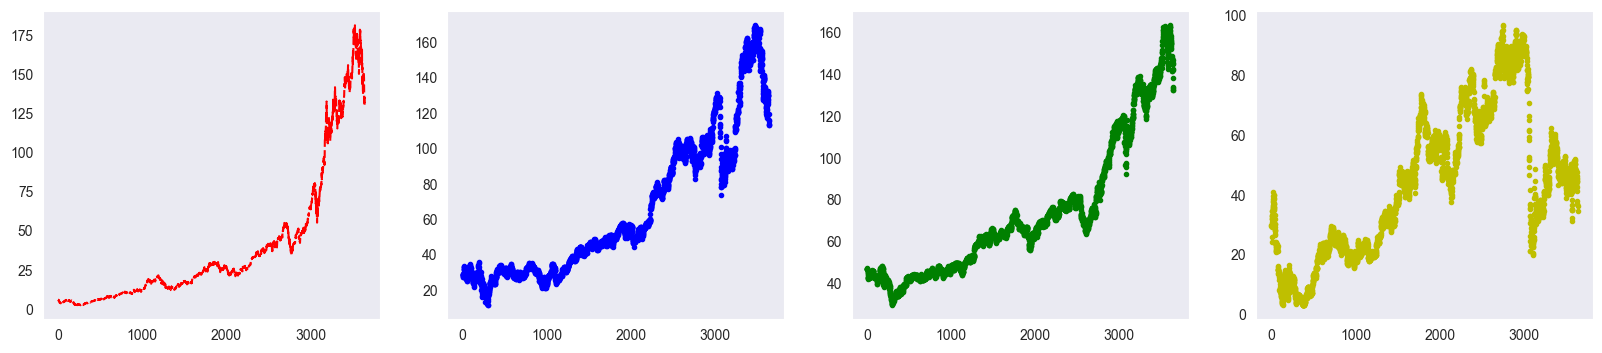

In [8]:
# Graficamos los precios de las acciones con subplots uno al lado del otro
plt.figure(figsize = (20, 4))

plt.subplot(1, 4, 1)
plt.plot(stocks_df['AAPL'], 'r--');
plt.grid()

plt.subplot(1, 4, 2)
plt.plot(stocks_df['JPM'], 'b.');
plt.grid()


plt.subplot(1, 4, 3)
plt.plot(stocks_df['PG'], 'g.');
plt.grid()

plt.subplot(1, 4, 4)
plt.plot(stocks_df['UAL'], 'y.');
plt.grid()

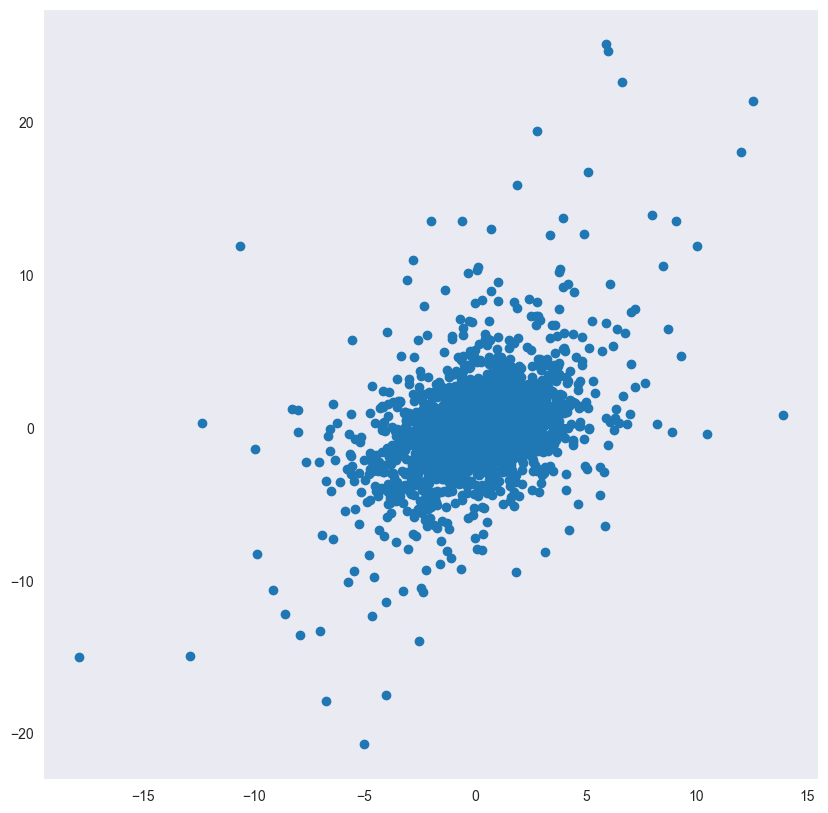

In [10]:
# Graficamos un diagrama de dispersion entre los redimientos diarios de Apple y JP Morgan
X = daily_returns_df['AAPL']
Y = daily_returns_df['JPM']
plt.figure(figsize = (10, 10))
plt.scatter(X, Y)
plt.grid()

C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ing_d\DataScience_ENV\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


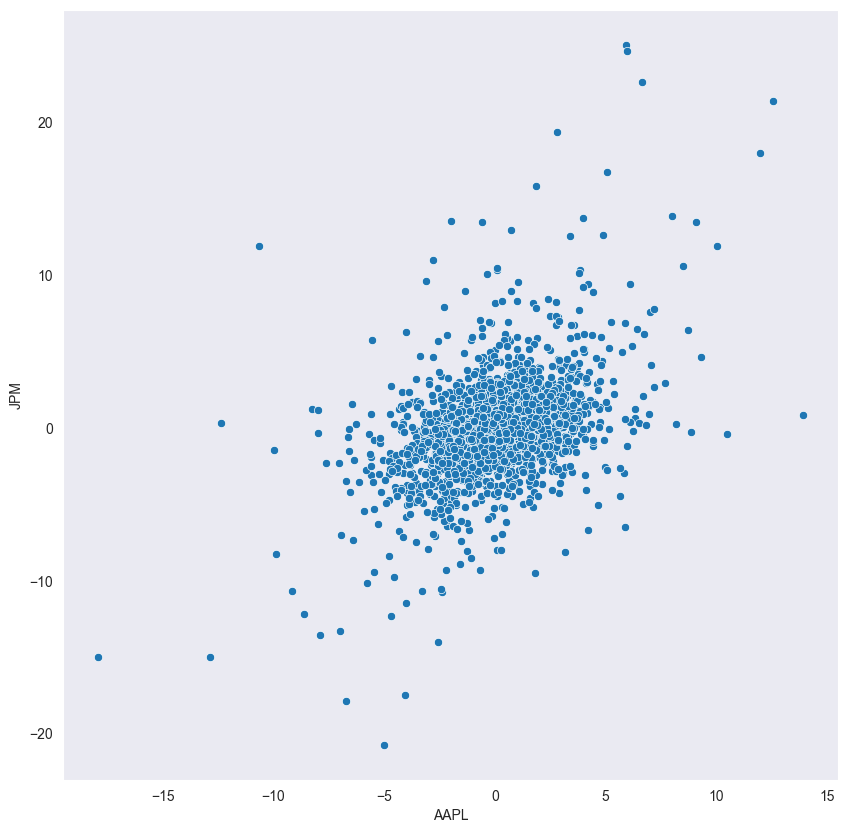

In [11]:
# Graficamos un diagrama de dispersion entre los redimientos diarios de Apple y JP Morgan con Seaborn
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'AAPL', y = 'JPM', data = daily_returns_df)
plt.grid()

Supondremos que decidimos volvernos alcista sobre AAPL y asignamos el 70% de nuestros activos. También decidimos dividir en partes iguales el resto de nuestros activos en otras acciones (JPM, PG y UAL). Con Matplotlib, representaremos un gráfico circular que muestre estas asignaciones. Utilizaremos el atributo 'explode' para aumentar la separación entre AAPL y el resto de la cartera.

In [12]:
values = [10, 70, 10, 10]
colors = ['r', 'g', 'b', 'y']
explode = (0, 0.2, 0, 0)
labels = ['JP Morgan Chase (JPM)', 'Apple (AAPL)', 'United Airlines (UAL)', 'Procter and Gamble (PG)']

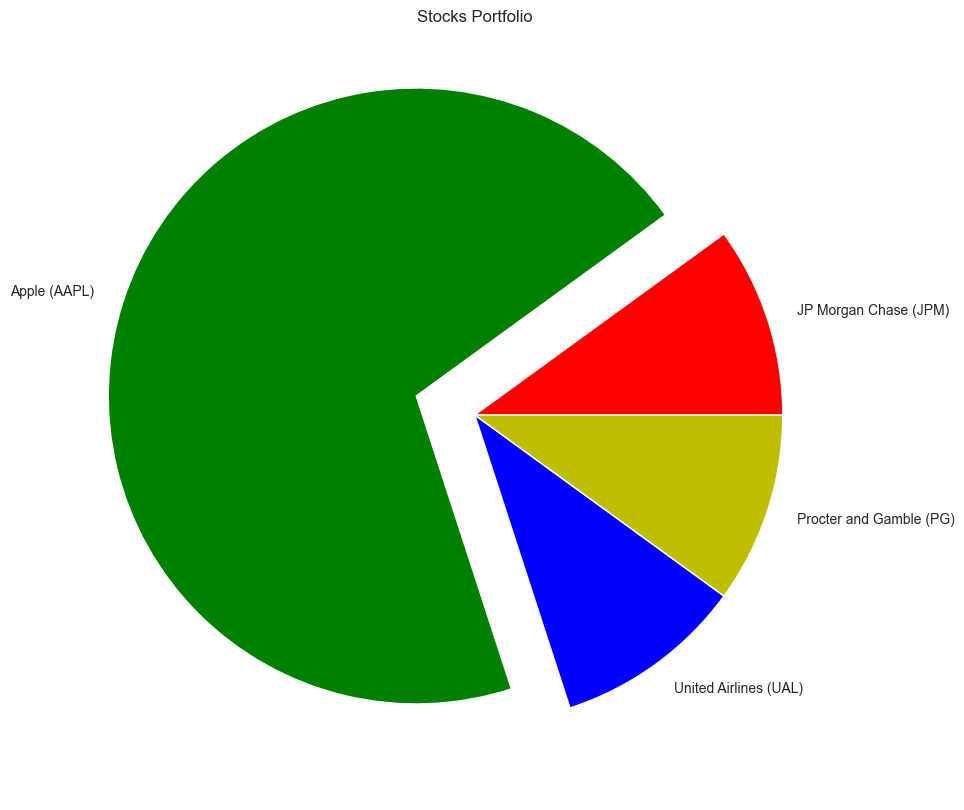

In [13]:
plt.figure(figsize = (10, 10))
plt.pie(values, colors = colors, labels = labels, explode = explode)
plt.title('Stocks Portfolio')
plt.show()

<Figure size 1000x1000 with 0 Axes>

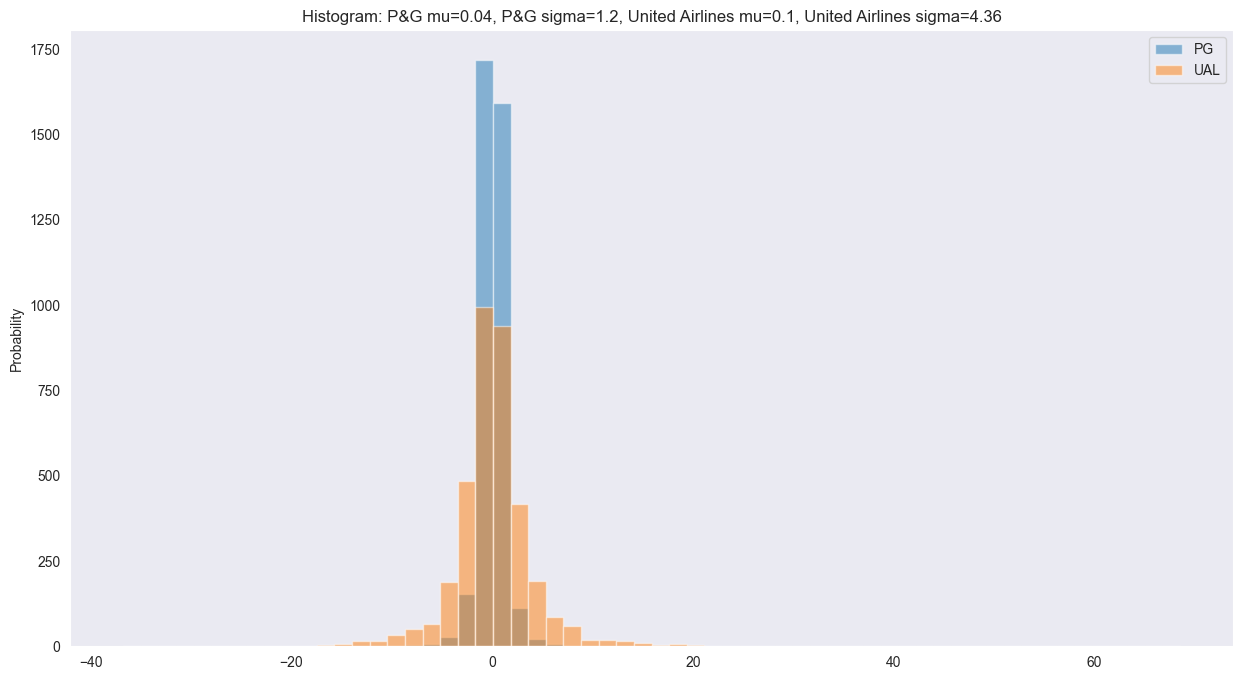

In [24]:
# Graficamos un histograma para los retornos de United Airlines y P&G
plt.figure(figsize = (10, 10))

mu_UAL = round(daily_returns_df['UAL'].mean(), 2)
sigma_UAL = round(daily_returns_df['UAL'].std(), 2)

mu_PG = round(daily_returns_df['PG'].mean(), 2)
sigma_PG = round(daily_returns_df['PG'].std(), 2)

daily_returns_df[['PG', 'UAL']].plot.hist(bins = 60, alpha = 0.5, figsize = (15, 8))
plt.grid()
plt.ylabel('Probability')

plt.title('Histogram: P&G mu=' + str(mu_PG) + ', P&G sigma=' + str(sigma_PG) + ', United Airlines mu=' + str(mu_UAL) + ', United Airlines sigma=' + str(sigma_UAL) );

<Axes: >

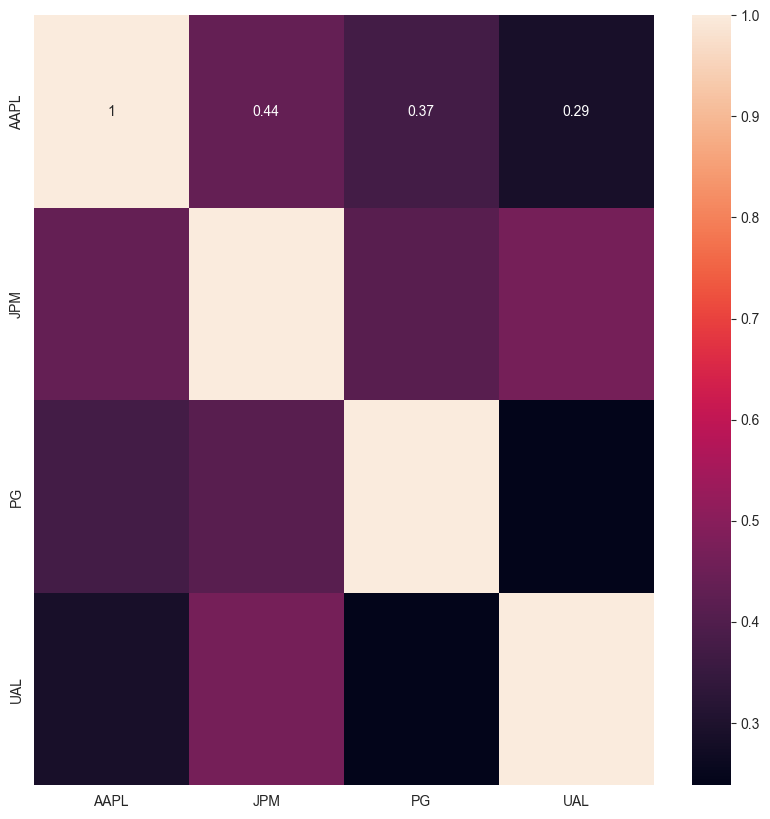

In [23]:
# Graficamos un mapa de calor que muestre las correlaciones entre los rendimientos diarios de las acciones
plt.figure(figsize = (10, 10))
cm = daily_returns_df.corr(numeric_only = True)
sns.heatmap(cm, annot = True)

Text(0.5, 0, 'United Airlines')

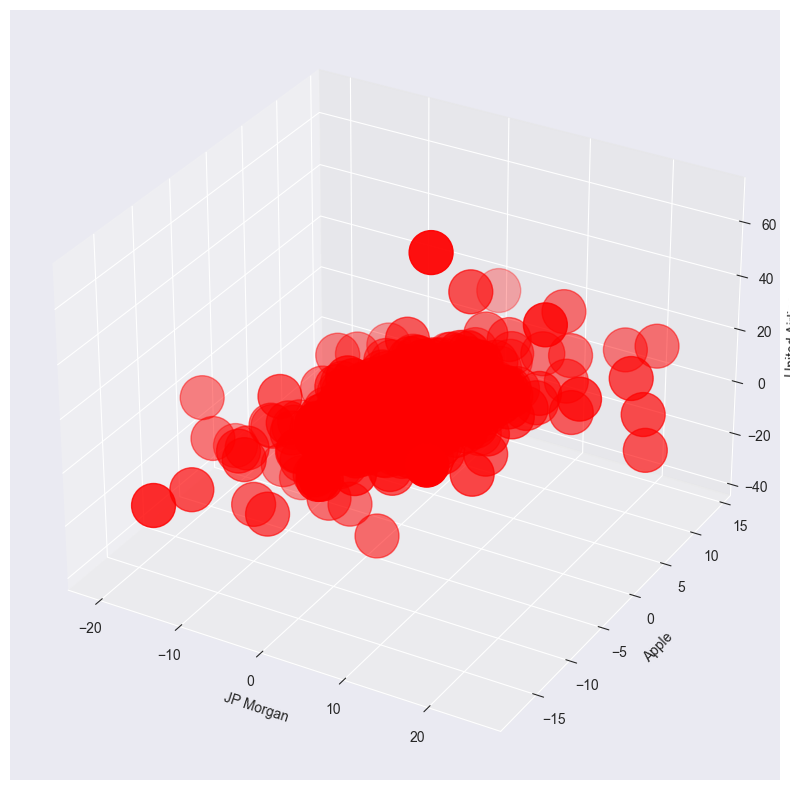

In [22]:
# Representaremos un gráfico 3D que muestre todos los retornos diarios de JPM, AAPL y UAL
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = daily_returns_df['JPM'].tolist()
y = daily_returns_df['AAPL'].tolist()
z = daily_returns_df['UAL'].tolist()

ax.scatter(x, y, z, c = 'r', marker = 'o', s = 1000)

ax.set_xlabel('JP Morgan')
ax.set_ylabel('Apple')
ax.set_zlabel('United Airlines')